# Clusterización de Datos: Segmentación de clientes

En este notebook estaremos desarrollando un análisis completo de Ciencia de Datos con Machine Learning para la segmentación de clientes.

De manera puntual, emplearemos una técnica de segmentación del comportamiento del cliente basada en datos conocida como RFM (Recencia o Actualidad, Frecuencia, y Valor Monetario). 

El dataset utilizado fue adaptado para nuestro entrenamiento, tomando como referencia un dataset de Kaggle llamado **Brazilian E-Commerce Public Dataset by Olist**.

*dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce*

## Aula 1

### 1.2 Importando y explorando el dataset

In [1]:
import pandas as pd, numpy as np , matplotlib.pyplot as plt , seaborn as sns, datetime

In [2]:
df = pd.read_csv('e_commerce.csv')
df.head()

,muestra,id_cliente,id_unico_cliente,item_id,cp_cliente,ciudad_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,precio_envio,pago_secuencial,pago_tipo,pago_cuotas,pago_valor,review,categoria,cp_vendedor,ciudad_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,bogota,DC,00e7ee1b050b8499577073aeb2a297a1,entregado,2017-05-16 15:05:35,...,21.88,1,credito,2,146.87,4,muebles_oficina,8577,bogota,DC
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,florencia,CAQ,c1d2b34febe9cd269e378117d6681172,entregado,2017-11-09 00:50:13,...,24.90,1,credito,1,275.79,1,muebles_oficina,8577,bogota,DC
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,florencia,CAQ,c1d2b34febe9cd269e378117d6681172,entregado,2017-11-09 00:50:13,...,24.90,1,credito,1,275.79,1,muebles_oficina,8577,bogota,DC
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,pereira,RIS,b1a5d5365d330d10485e0203d54ab9e8,entregado,2017-05-07 20:11:26,...,15.62,1,credito,7,140.61,3,muebles_oficina,8577,bogota,DC
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,medellin,ANT,2e604b3614664aa66867856dba7e61b7,entregado,2018-02-03 19:45:40,...,30.59,1,credito,10,137.58,4,muebles_oficina,8577,bogota,DC


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   muestra            116581 non-null  int64  
 1   id_cliente         116581 non-null  object 
 2   id_unico_cliente   116581 non-null  object 
 3   item_id            116581 non-null  int64  
 4   cp_cliente         116581 non-null  int64  
 5   ciudad_cliente     116581 non-null  object 
 6   estado_cliente     116581 non-null  object 
 7   id_pedido          116581 non-null  object 
 8   status_pedido      116581 non-null  object 
 9   horario_pedido     116581 non-null  object 
 10  pedido_aprobado    116567 non-null  object 
 11  pedido_entregador  115368 non-null  object 
 12  pedido_entregado   114066 non-null  object 
 13  fecha_estimada     116581 non-null  object 
 14  id_vendedor        116581 non-null  object 
 15  precio             116581 non-null  float64
 16  pr

### 1.2.1 Columnas y Descripción

**muestra**: Numeración creciente de los datos.

**id_cliente**: Número de identificación del cliente que realiza la compra.

**id_unico_cliente**: Número único para cada cliente en función de su dirección IP, independiente de la compra. 

**item_id**: Número de identificación del item comprado.

**cp_cliente**: Código postal del cliente.

**ciudad_cliente**: Ciudad donde se realizó el pedido.

**estado_cliente**: Estado donde se realizó el pedido.

**id_pedido**: Número de identificación de la compra.

**status_pedido**: Status del pedido (Ej. Entregado, facturado, procesando, etc).

**horario_pedido**: Fecha y hora en la cual se realizó el pedido.

**pedido_aprobado**: Fecha y hora en la cual se aprobó el pedido.  
**pedido_entregador**: Fecha y hora en la cual se hizo entrega del pedido a la empresa transportadora.  

**pedido_entregado**:Fecha y hora en la cual se hizo entrega del pedido al cliente.

**fecha_estimada**:Fecha y hora estimada de entrega.

**id_vendedor**: Número de identificación del vendedor.

**precio**: Precio del producto.

**precio_envio**: Precio del envío.

**pago_secuencial**: Compra en la cual el cliente solicita más de una forma de pago (Ej. Crédito y débito, etc).

**pago_tipo**: Método de pago (Ej. factura, débito, voucher).

**pago_cuotas**: Número de cuotas escogido por el cliente para realizar el pago.

**pago_valor**: Valor total pago.

**review**: Nota que el consumidor da a todo el proceso.

**categoria**: Categoría del item comprado. 

**cp_vendedor**: Código postal del vendedor.

**ciudad_vendedor**: Ciudad del vendedor.

**estado_vendedor**: Estado del vendedor.

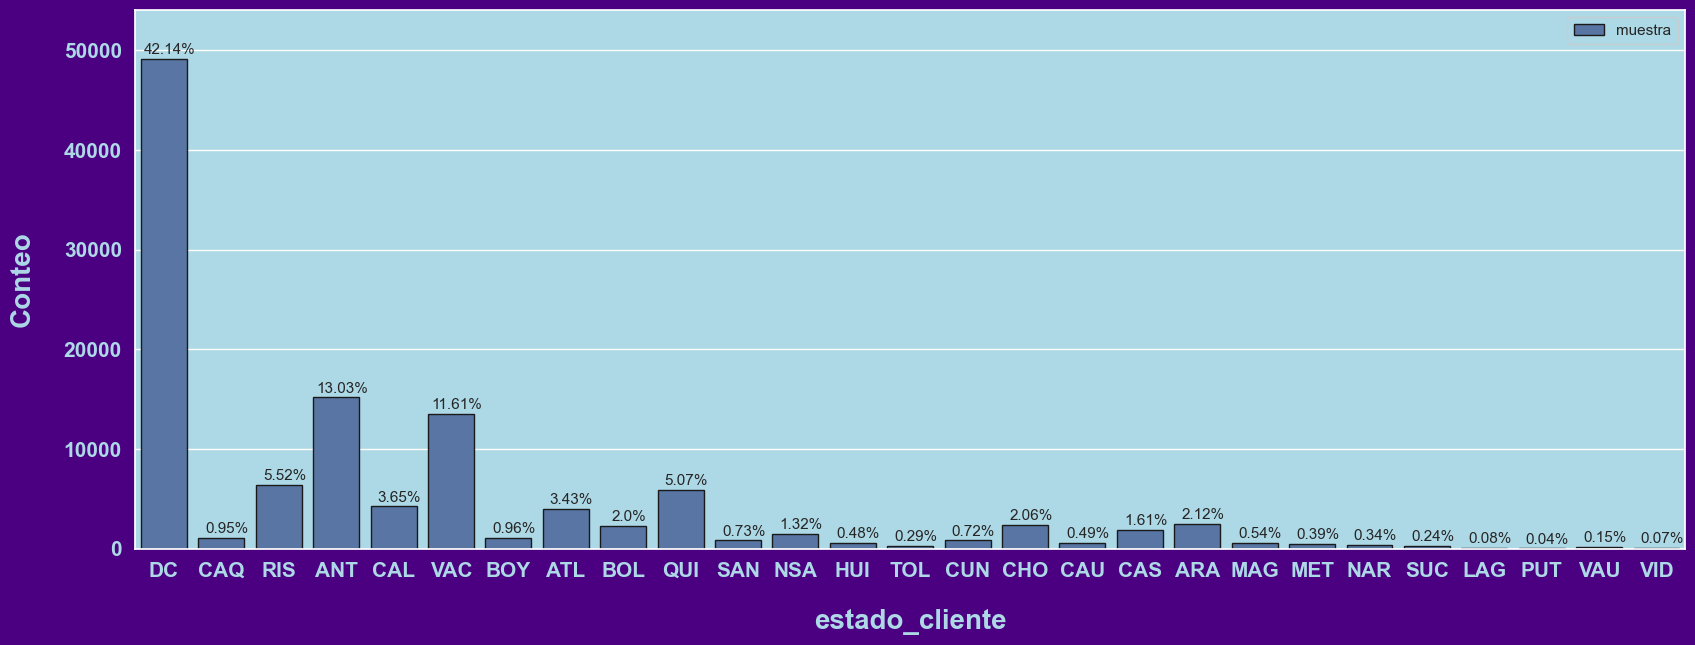

In [4]:
def plot_porcentajes(estado,datos):
    sns.set(rc={"axes.facecolor": "lightblue"})
    plt.figure(figsize=(20,7), facecolor='indigo')
    grafico  = sns.countplot(x=estado, data=datos, orient='h', edgecolor='k')
    grafico.set_ylabel('Contéo', fontsize=25)
    
    size = []
    for p in grafico.patches:
        height = p.get_height()
        size.append(height)
        grafico.text(p.get_x() + p.get_width()/1.6, height+200,f'{round(height/len(datos)*100,2)}%',ha='center',va='bottom',fontsize=11)
    grafico.set_ylim(0, max(size)*1.1)
    plt.xlabel('estado_cliente', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.ylabel('Conteo', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.legend(df)
plot_porcentajes('estado_cliente',df)

### 1.3 Análisis exploratorio de los datos

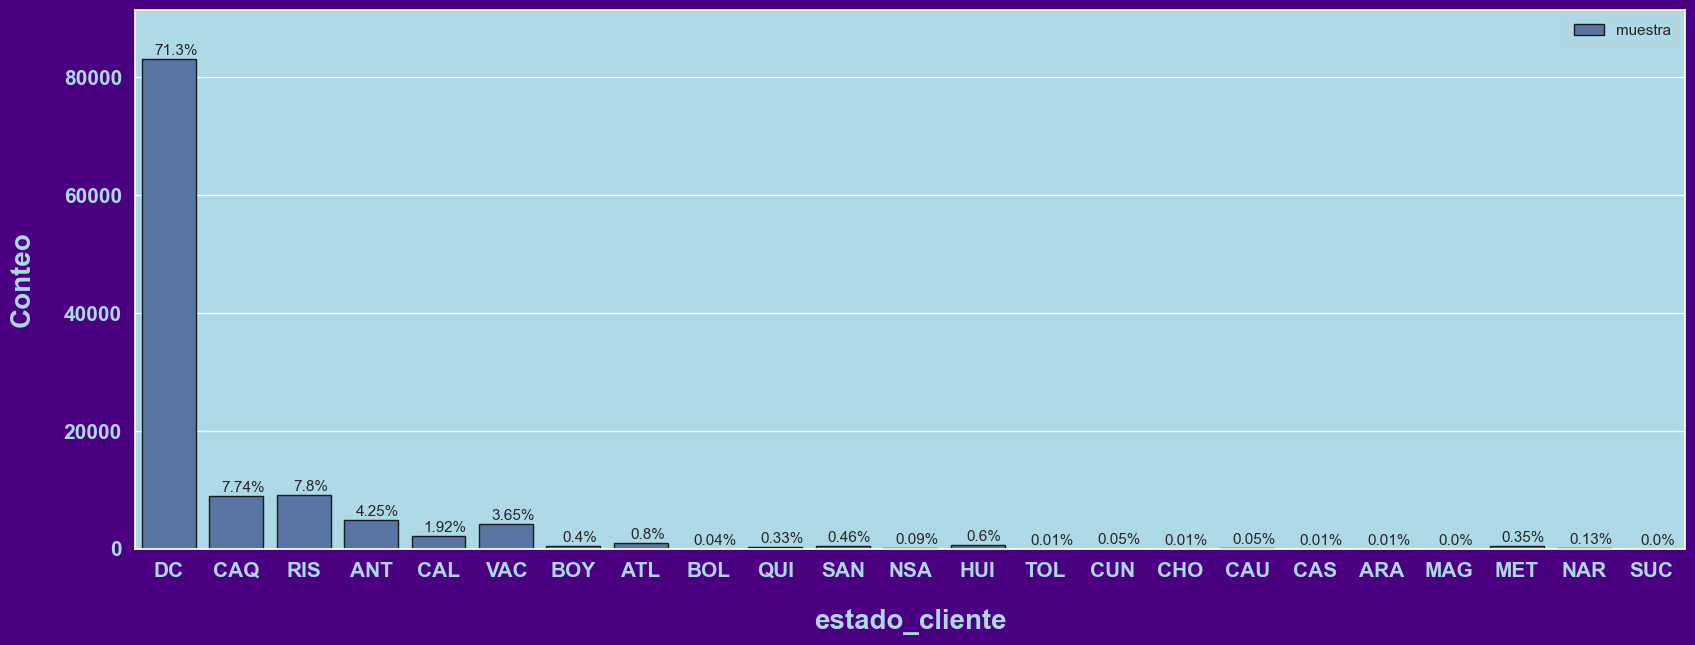

In [5]:
plot_porcentajes('estado_vendedor',df)

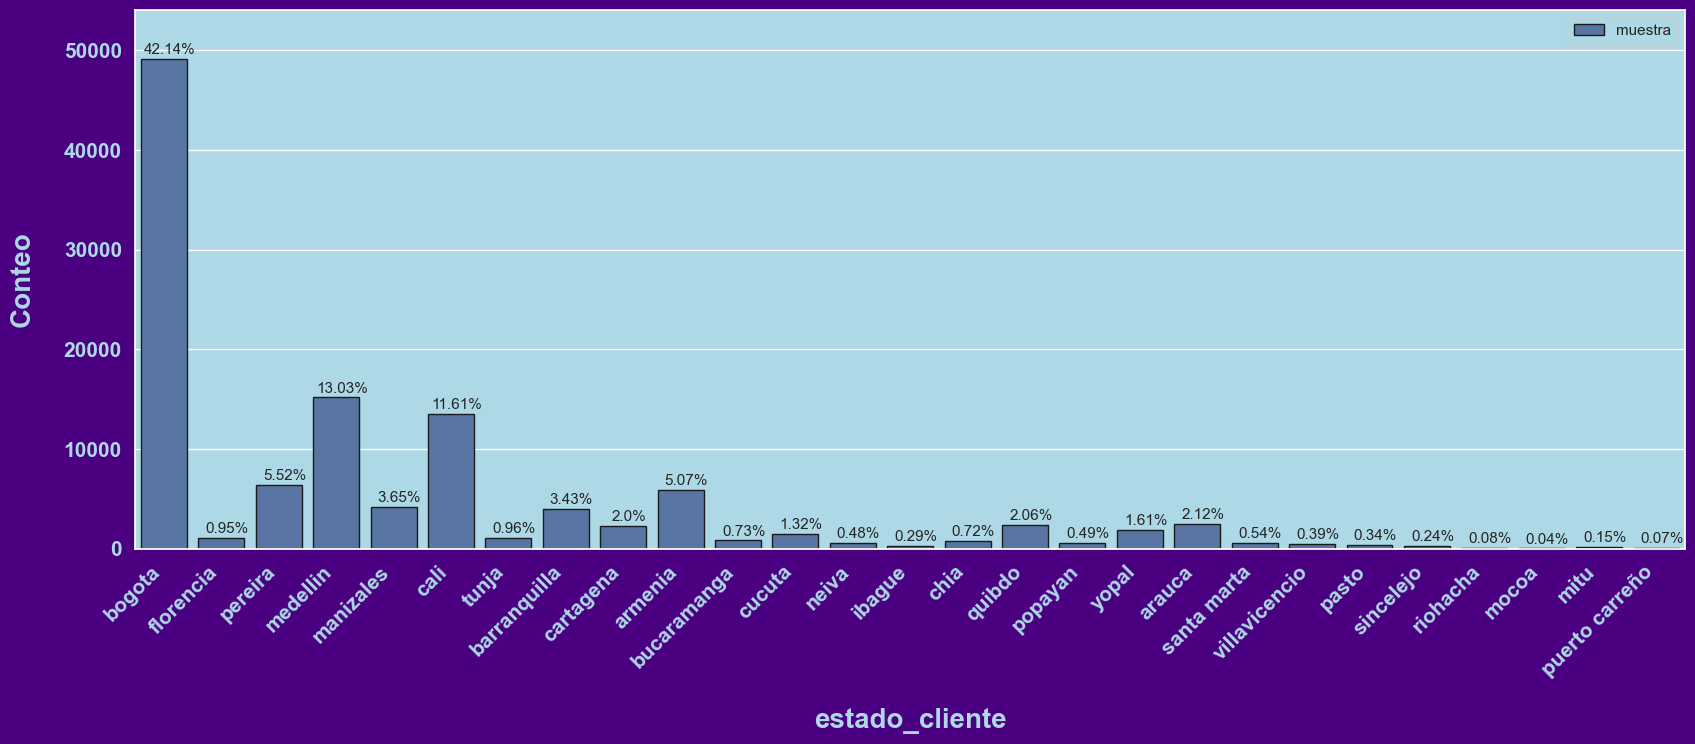

In [6]:
def plot_porcentajes(estado,datos):
    sns.set(rc={"axes.facecolor": "lightblue"})
    plt.figure(figsize=(20,7), facecolor='indigo')
    grafico  = sns.countplot(x=estado, data=datos, orient='h', edgecolor='k')
    grafico.set_ylabel('Contéo', fontsize=25)
    
    size = []
    for p in grafico.patches:
        height = p.get_height()
        size.append(height)
        grafico.text(p.get_x() + p.get_width()/1.6, height+200,f'{round(height/len(datos)*100,2)}%',ha='center',va='bottom',fontsize=11)
    grafico.set_ylim(0, max(size)*1.1)
     # Inclina los valores del eje x a 45 grados
      # Configura las posiciones de las marcas (ticks) en el eje x
    grafico.set_xticks(grafico.get_xticks())

    # Inclina los valores del eje x a 45 grados
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha='right')
    plt.xlabel('estado_cliente', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.ylabel('Conteo', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.legend(df)
plot_porcentajes('ciudad_cliente',df)

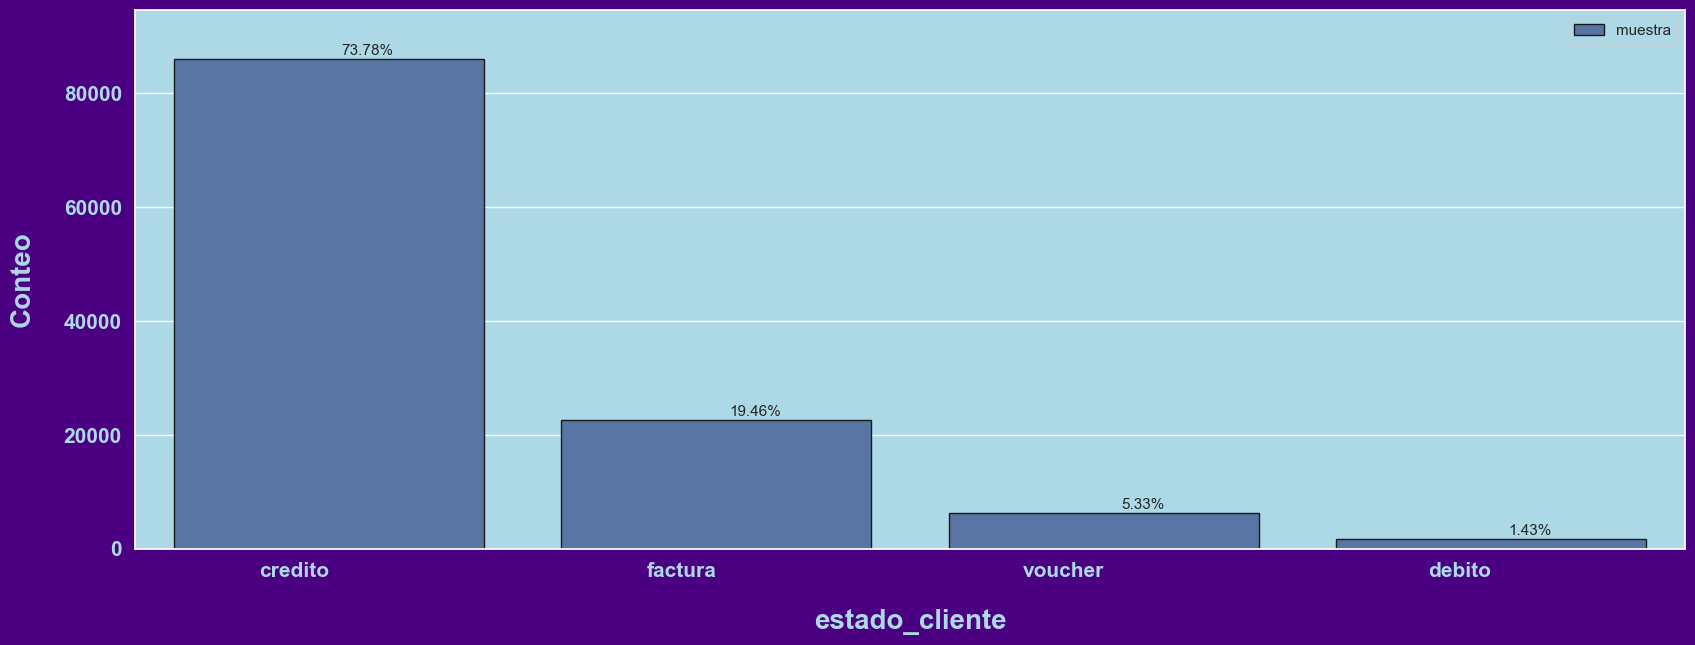

In [7]:
def plot_porcentajes(estado,datos):
    sns.set(rc={"axes.facecolor": "lightblue"})
    plt.figure(figsize=(20,7), facecolor='indigo')
    grafico  = sns.countplot(x=estado, data=datos, orient='h', edgecolor='k')
    grafico.set_ylabel('Contéo', fontsize=25)
    
    size = []
    for p in grafico.patches:
        height = p.get_height()
        size.append(height)
        grafico.text(p.get_x() + p.get_width()/1.6, height+200,f'{round(height/len(datos)*100,2)}%',ha='center',va='bottom',fontsize=11)
    grafico.set_ylim(0, max(size)*1.1)
     # Inclina los valores del eje x a 45 grados
      # Configura las posiciones de las marcas (ticks) en el eje x
    grafico.set_xticks(grafico.get_xticks())

    # Inclina los valores del eje x a 45 grados
    grafico.set_xticklabels(grafico.get_xticklabels(), rotation=0, ha='right')
    plt.xlabel('estado_cliente', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.ylabel('Conteo', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    plt.legend(df)
plot_porcentajes('pago_tipo',df)

## Aula 2

### 2.1 Modelo RFM 

#### **Recencia (R)**
##### ¿Hace cuántos días fue la última compra que realizó este cliente?

#### **Frecuencia (F)**
##### ¿Cuántas compras este cliente hizo en tu empresa, desde que se registró?

#### **Valor Monetario (M)**
##### ¿Cuánto dinero este cliente ya gastó en tu empresa?

In [8]:
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','precio']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [9]:
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'fecha_max_compra']
df_compra['fecha_max_compra'] = pd.to_datetime(df_compra['fecha_max_compra'])
df_compra.head()

,id_unico_cliente,fecha_max_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [10]:
df_compra['recencia'] = (df_compra['fecha_max_compra'].max() - df_compra['fecha_max_compra']).dt.days
df_compra.head()

,id_unico_cliente,fecha_max_compra,recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [11]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','recencia']],on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


### 2.2 Regla del codo

Ahora, necesitamos usar el Método del Codo, la idea es ejecutar el algoritmo KMeans para varias cantidades diferentes de clusters y así poder determinar el número ideal de clusters. 

A medida que aumentamos el número de clusters con KMeans, las diferencias entre los diversos clusters disminuyen y las diferencias por dentro de los clusters van aumentando. Entonces, debemos hallar un equilibrio de modo que las observaciones que conforman cada agrupación sean lo más homogéneas posible y que las diversas agrupaciones se puedan diferenciar entre sí.

### 2.3 Codificando la Regla del Codo

In [12]:
from sklearn.cluster import KMeans

In [13]:
def calcular_inercia(datos):
    inercia = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=datos)
        datos['clusters']= kmeans.labels_
        inercia.append(kmeans.inertia_)
    return inercia

In [14]:
df_recencia = df_usuario[['recencia']]
df_recencia.head()

,recencia
0,474
1,298
2,298
3,483
4,211


In [15]:
suma_cuadrados = calcular_inercia(df_recencia)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10236\450105505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['clusters']= kmeans.labels_
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\

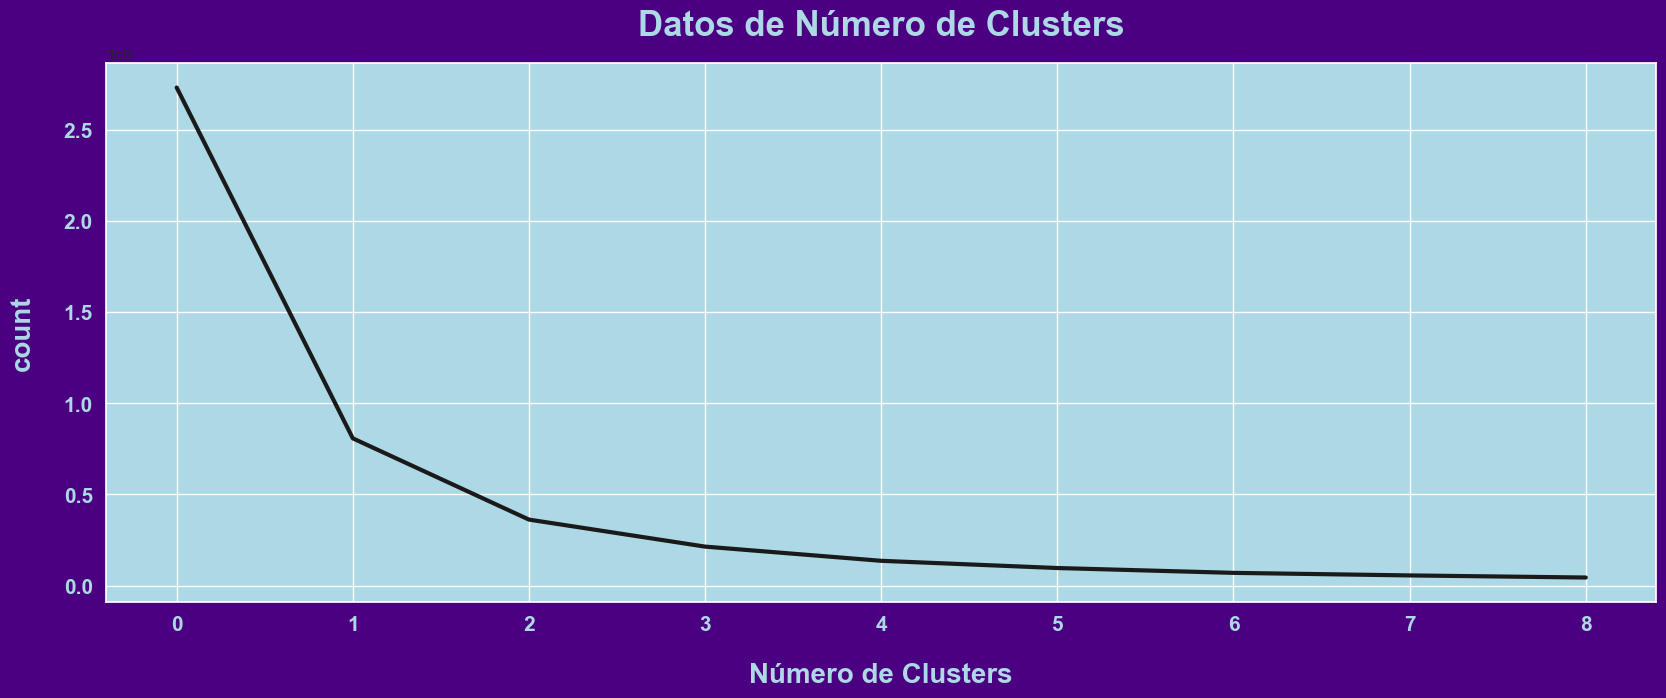

In [16]:
def grafico():
    plt.figure(figsize=(20,7), facecolor='indigo')
    plt.plot(suma_cuadrados, color='k',ls='solid',lw=3)
    plt.title('Datos de Número de Clusters', size= 25, color='lightblue', fontweight='bold', pad=20)
    plt.xlabel('Número de Clusters', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.ylabel('count', size= 20, color='lightblue', fontweight='bold',labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(suma_cuadrados, loc='best', fontsize=15)
    plt.show()
grafico()

### 2.4 Regla Matemática

¿Cómo podemos identificar si el mejor número de clusters es 3, 4 o 5? 

¡Existe una solución matemática! 



> ![](https://miro.medium.com/max/2775/1*9J7Wnh5L0eIcHXBeWlzvNA.png)


Lo primero que debemos hacer, es definir una recta conectando el primer punto (cluster 1) al último punto (cluster 9). 

En este caso, P0 es el punto del cluster 1 y P1 es el punto del cluster 9. El par (x,y) representa las coordenadas de cualquier punto desde el cual deseemos  calcular la distancia hasta la recta. Calculando todas las distancias, lograremos determinar el punto que indica el número ideal de clusters.

### 2.5 Codificando la Regla Matemática

In [17]:
def numero_ideal_cluster(inercia):
    x1, y1 = 2, inercia[0]
    x2, y2 = 20, inercia[-1]
    
    distancia = []
    for i in range(len(inercia)):
        x0 = i+2
        y0  = inercia[i]
        numerador = abs((y2-y1)*x0-(x2-x1)*y0+x2*y1 - y2*x1)
        denominador = ((y2-y1)**2+(x2-x1)**2)**(1/2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia))+2

In [18]:
print(f'El número ideal de clusters es: {numero_ideal_cluster(suma_cuadrados)}')

El número ideal de clusters es: 4


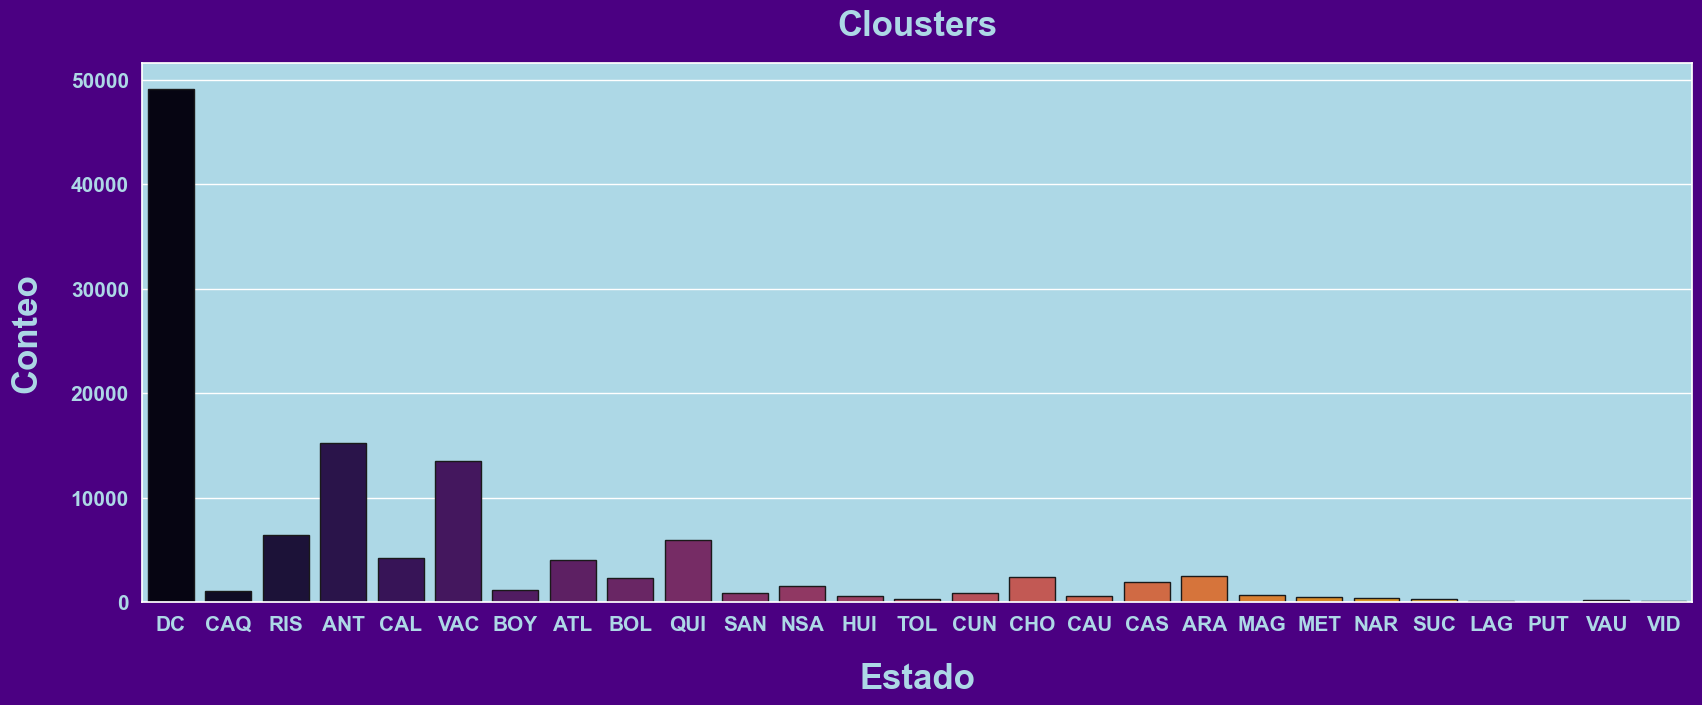

In [19]:
def grafico():
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.countplot(data=df, x='estado_cliente',hue='estado_cliente', palette='inferno', edgecolor='k');
    ax.figure.set_size_inches(20,7)
    ax.set_title('Clousters', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('Estado', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('Conteo',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(tarjetas)
    plt.show()
grafico()

In [20]:
df.columns

Index(['muestra', 'id_cliente', 'id_unico_cliente', 'item_id', 'cp_cliente',
       'ciudad_cliente', 'estado_cliente', 'id_pedido', 'status_pedido',
       'horario_pedido', 'pedido_aprobado', 'pedido_entregador',
       'pedido_entregado', 'fecha_estimada', 'id_vendedor', 'precio',
       'precio_envio', 'pago_secuencial', 'pago_tipo', 'pago_cuotas',
       'pago_valor', 'review', 'categoria', 'cp_vendedor', 'ciudad_vendedor',
       'estado_vendedor'],
      dtype='object')

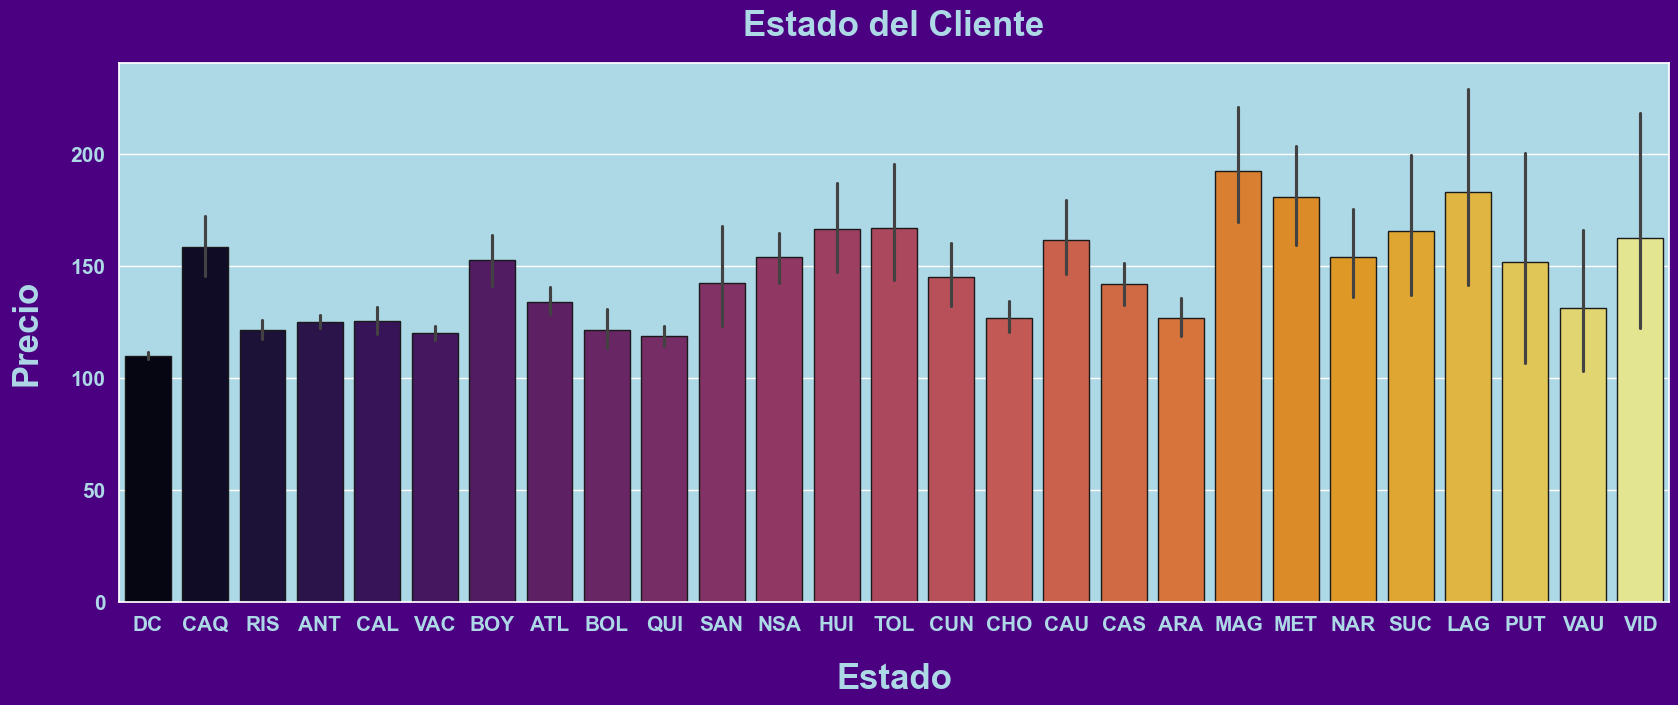

In [21]:
def grafico():
  sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})

  # Gráfico de barras para mayor valor de compra por estado
  ax = sns.barplot(data=df, x='estado_cliente', y=df['precio'], hue='estado_cliente', palette='inferno', edgecolor='k')
  ax.figure.set_size_inches(20, 7)
  ax.set_title('Estado del Cliente', fontsize=25, color='lightblue', fontweight='bold', pad=20)
  ax.set_xlabel('Estado', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
  ax.set_ylabel('Precio', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
  plt.xticks(color='lightblue', size=15, fontweight='bold')
  plt.yticks(color='lightblue', size=15, fontweight='bold')
  # plt.legend(df)
  plt.show()

grafico()

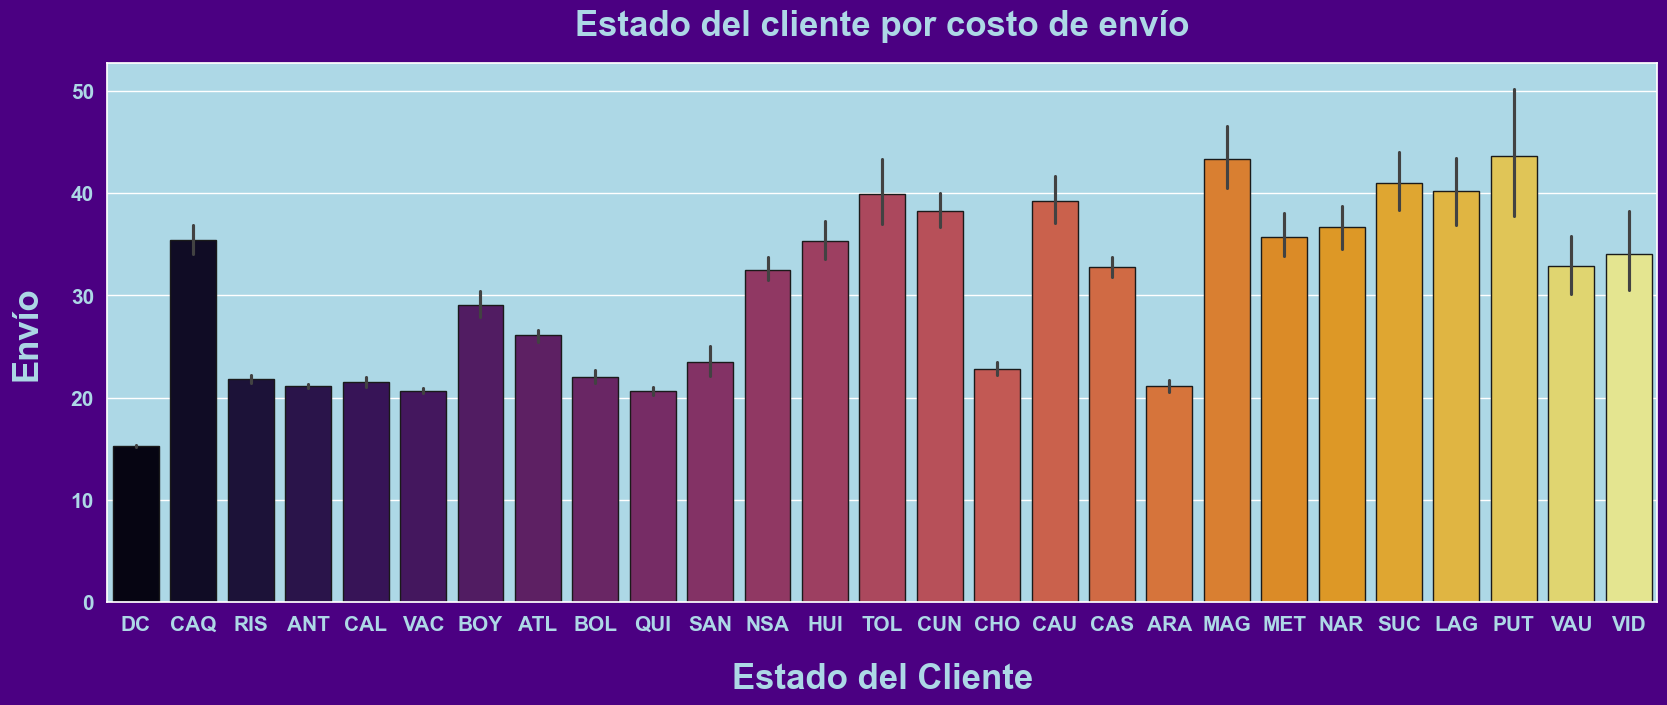

In [22]:
def grafico():
  sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})

  # Gráfico de barras para mayor valor de compra por estado
  ax = sns.barplot(data=df[df['precio_envio'] != -1], x='estado_cliente', y=df['precio_envio'], hue='estado_cliente', palette='inferno', edgecolor='k')
  ax.figure.set_size_inches(20, 7)
  ax.set_title('Estado del cliente por costo de envío', fontsize=25, color='lightblue', fontweight='bold', pad=20)
  ax.set_xlabel('Estado del Cliente', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
  ax.set_ylabel('Envío', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
  plt.xticks(color='lightblue', size=15, fontweight='bold')
  plt.yticks(color='lightblue', size=15, fontweight='bold')
  # plt.legend(df)
  plt.show()

grafico()

## Aula 3

### 3.1 Clusterizando la Recencia

In [23]:
kmeans = KMeans(n_clusters=4, n_init=10)
df_usuario['recencia_cluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,2


In [24]:
agrupado_por_cluster = df_usuario.groupby('recencia_cluster')['recencia'].mean().reset_index()
agrupado_por_cluster.head()

,recencia_cluster,recencia
0,0,319.957296
1,1,66.405850
2,2,187.293338
3,3,490.622269


In [25]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='recencia', ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado.head()

,recencia_cluster,recencia
0,3,490.622269
1,0,319.957296
2,2,187.293338
3,1,66.405850


In [26]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado

,recencia_cluster,recencia,index
0,3,490.622269,0
1,0,319.957296,1
2,2,187.293338,2
3,1,66.405850,3


In [27]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['recencia_cluster','index']],
                            on='recencia_cluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,0


In [28]:
removiendo_datos = juntando_cluster.drop(['recencia_cluster'],axis=1)
removiendo_datos.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [29]:
df_final = removiendo_datos.rename(columns={'index':'recencia_cluster'})
df_final.sample(3)

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster
42421,9630f071c42911730039a7e04fcea49b,7fe3cf500fdf23475a1bf979578ff7c3,2017-12-15 19:18:59,1,38.9,261,1
20043,1f12669320234d7995d1651289fa2b26,549b554209824d8a5d48256ca44cbbe3,2017-03-09 21:18:57,1,109.9,542,0
80361,f2e3498588a57167bead72d5b224b15f,630e8325f479925204cabba69b0a07d5,2018-03-14 11:41:55,1,39.0,172,2


In [30]:
def ordenador_cluster(cluster_actual, target, df, asc=False):
    agrupado_por_cluster = df_usuario.groupby(cluster_actual)[target].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target, ascending=asc).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[[cluster_actual,'index']],on=cluster_actual)
    removiendo_datos = juntando_cluster.drop([cluster_actual],axis=1)
    df_final = removiendo_datos.rename(columns={'index':cluster_actual})
    return df_final

In [31]:
df_usuario = ordenador_cluster('recencia_cluster', 'recencia', df_usuario)

In [32]:
df_usuario.groupby('recencia_cluster')['recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
recencia_cluster,,,,,,,,
0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,30957.0,319.957296,44.086874,254.0,281.0,313.0,357.0,405.0
2,33712.0,187.293338,35.169771,127.0,158.0,187.0,218.0,253.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


### 3.2 Clusterizando la Frecuencia

In [33]:
df_frecuencia = df.groupby('id_unico_cliente').pedido_aprobado.count().reset_index()
df_frecuencia.columns = ['id_unico_cliente','frecuencia']
df_frecuencia.head()

,id_unico_cliente,frecuencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [34]:
df_usuario = pd.merge(df_usuario, df_frecuencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [35]:
df_frecuencia = df_usuario[['frecuencia']]
kmeans = KMeans(n_clusters=4, n_init=10)
df_usuario['frecuencia_cluster'] = kmeans.fit_predict(df_frecuencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia,frecuencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [36]:
df_usuario.groupby('frecuencia_cluster')['frecuencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frecuencia_cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
2,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
3,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0


In [37]:
df_usuario = ordenador_cluster('frecuencia_cluster','frecuencia',df_usuario, asc=True)

In [38]:
df_usuario.groupby('frecuencia_cluster')['frecuencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frecuencia_cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


### 3.3 Clousterizando el valor monetario(Ingreso)

In [39]:
df_ingreso = df.groupby('id_unico_cliente').pago_valor.sum().reset_index()
df_ingreso.columns = ['id_unico_cliente','ingresos']
df_usuario = pd.merge(df_usuario, df_ingreso, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [40]:
df_pago = df_usuario[['ingresos']]
df_pago.head()

,ingresos
0,146.87
1,140.61
2,142.05
3,155.70
4,148.33


In [41]:
kmeans = KMeans(n_clusters=4, n_init=10)
df_usuario['ingresos_cluster'] = kmeans.fit_predict(df_pago)

In [42]:
df_usuario = ordenador_cluster('ingresos_cluster','ingresos',df_usuario, asc=True)

In [43]:
df_usuario.groupby('ingresos_cluster')['ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
ingresos_cluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


### 4.1 Creando la puntuación

In [44]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,precio,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos,ingresos_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [45]:
df_final = df_usuario[['id_unico_cliente','recencia','recencia_cluster','frecuencia','frecuencia_cluster','ingresos','ingresos_cluster']]
df_final.tail()

,id_unico_cliente,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos,ingresos_cluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [46]:
df_final.loc[1:,'puntuacion'] = df_usuario['recencia_cluster'] + df_usuario['frecuencia_cluster'] + df_usuario['ingresos_cluster']

C:\Users\DELL\AppData\Local\Temp\ipykernel_10236\3153039446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[1:,'puntuacion'] = df_usuario['recencia_cluster'] + df_usuario['frecuencia_cluster'] + df_usuario['ingresos_cluster']


In [47]:
df_final.sample(5)

,id_unico_cliente,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos,ingresos_cluster,puntuacion
69011,9ddd2261a136ef55ad424aa29f452aba,188,2,1,0,96.22,0,2.0
54203,0ecd68e0fa580ae3f923fdd46fb0f95a,149,2,1,0,139.99,0,2.0
28897,d082759e461daff44700b6cecbe67860,394,1,1,0,62.27,0,1.0
60619,37f189dbcb4d9c62cf25ffc3e16c5bc0,241,2,1,0,204.88,0,2.0
67711,1d6f7c413799e94a179e9c079908527d,237,2,1,0,32.47,0,2.0


In [48]:
df_final['puntuacion'].max()

7.0

In [49]:
df_final['segmento'] = 'inactivo'
df_final.loc[df_final['puntuacion']>=1,'segmento']='bisiness'
df_final.loc[df_final['puntuacion']>=3,'segmento']='master'
df_final.loc[df_final['puntuacion']>=5,'segmento']='premiunm'

C:\Users\DELL\AppData\Local\Temp\ipykernel_10236\2155485040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['segmento'] = 'inactivo'


In [50]:
df_final['segmento'].value_counts()

segmento
bisiness    63159
master      34386
inactivo    18361
premiunm      675
Name: count, dtype: int64

In [51]:
df_final.to_csv('RFM.csv')

In [52]:
df_final

,id_unico_cliente,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos,ingresos_cluster,puntuacion,segmento
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,NaN,inactivo
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0.0,inactivo
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0.0,inactivo
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0.0,inactivo
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0.0,inactivo
...,...,...,...,...,...,...,...,...,...
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5.0,premiunm
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5.0,premiunm
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5.0,premiunm
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5.0,premiunm


### 4.2 Análisis visual de los resultados

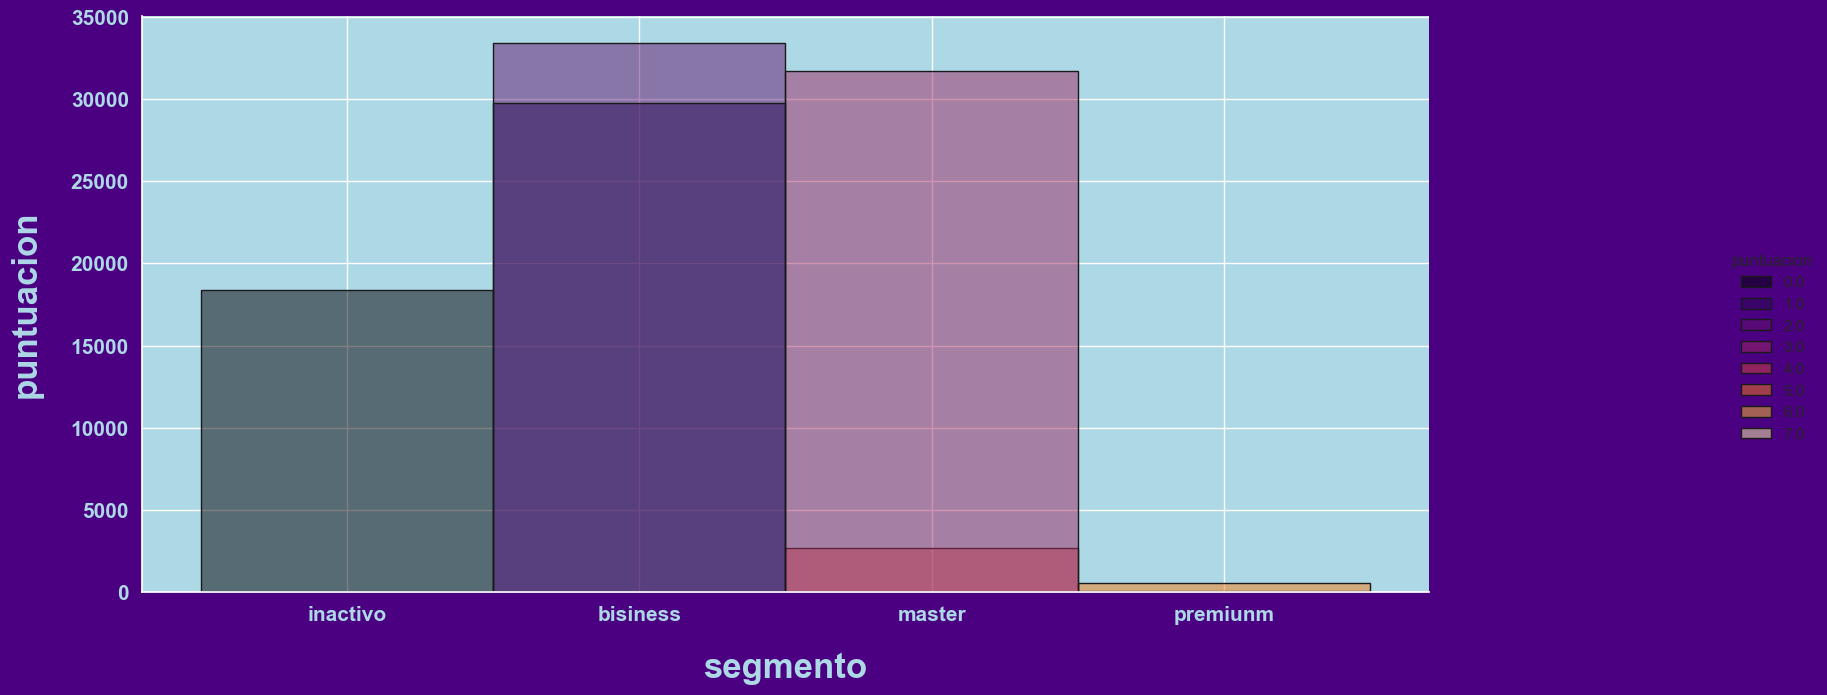

In [53]:
def grafico():
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.displot(data=df_final, x='segmento',hue='puntuacion', palette='inferno', kde=True,edgecolor='k');
    ax.figure.set_size_inches(20,7)
    ax.set_titles('segmento', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabels('segmento', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabels('puntuacion',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(df_final['morosos'], loc='upper right', bbox_to_anchor=(1.15,.95))
    plt.show()
grafico()

In [54]:
df_final.sample()

,id_unico_cliente,recencia,recencia_cluster,frecuencia,frecuencia_cluster,ingresos,ingresos_cluster,puntuacion,segmento
85813,d9a17f8bb519e86263387ece99150350,13,3,2,0,107.56,0,3.0,master


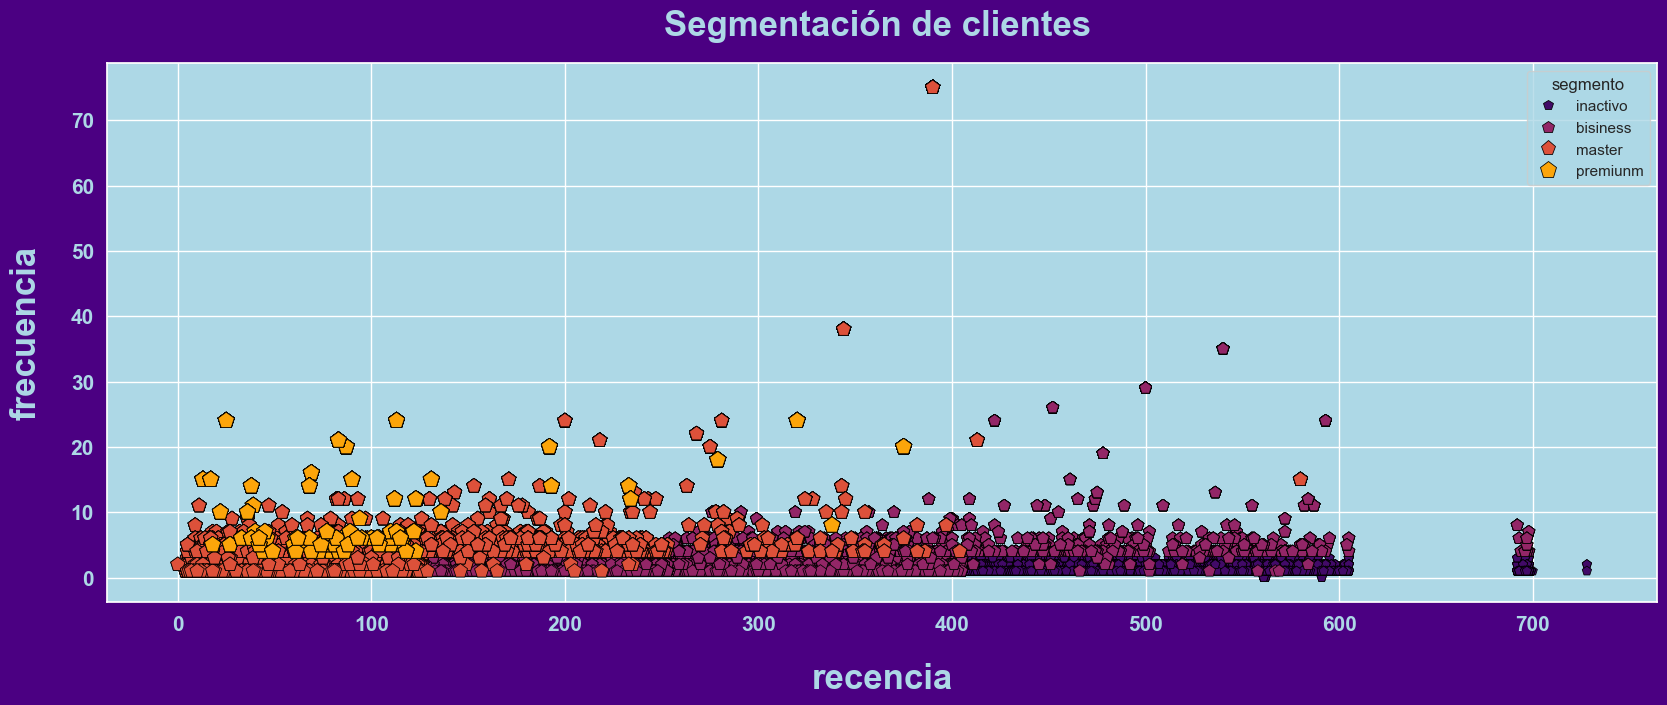

In [55]:
def grafico(x,y,datos):
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.scatterplot(data=datos, x=x , y=y, hue='segmento', palette='inferno',marker='p', edgecolor='black', size='segmento',sizes=(50,150),size_order=['premiunm', 'master','bisiness','inactivo']);
    ax.figure.set_size_inches(20,7)
    ax.set_title('Segmentación de clientes ' ,fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('recencia', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('frecuencia',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(['segmento'], loc='upper right', bbox_to_anchor=(1.15,.95))
    plt.show()
grafico('recencia','frecuencia',df_final)

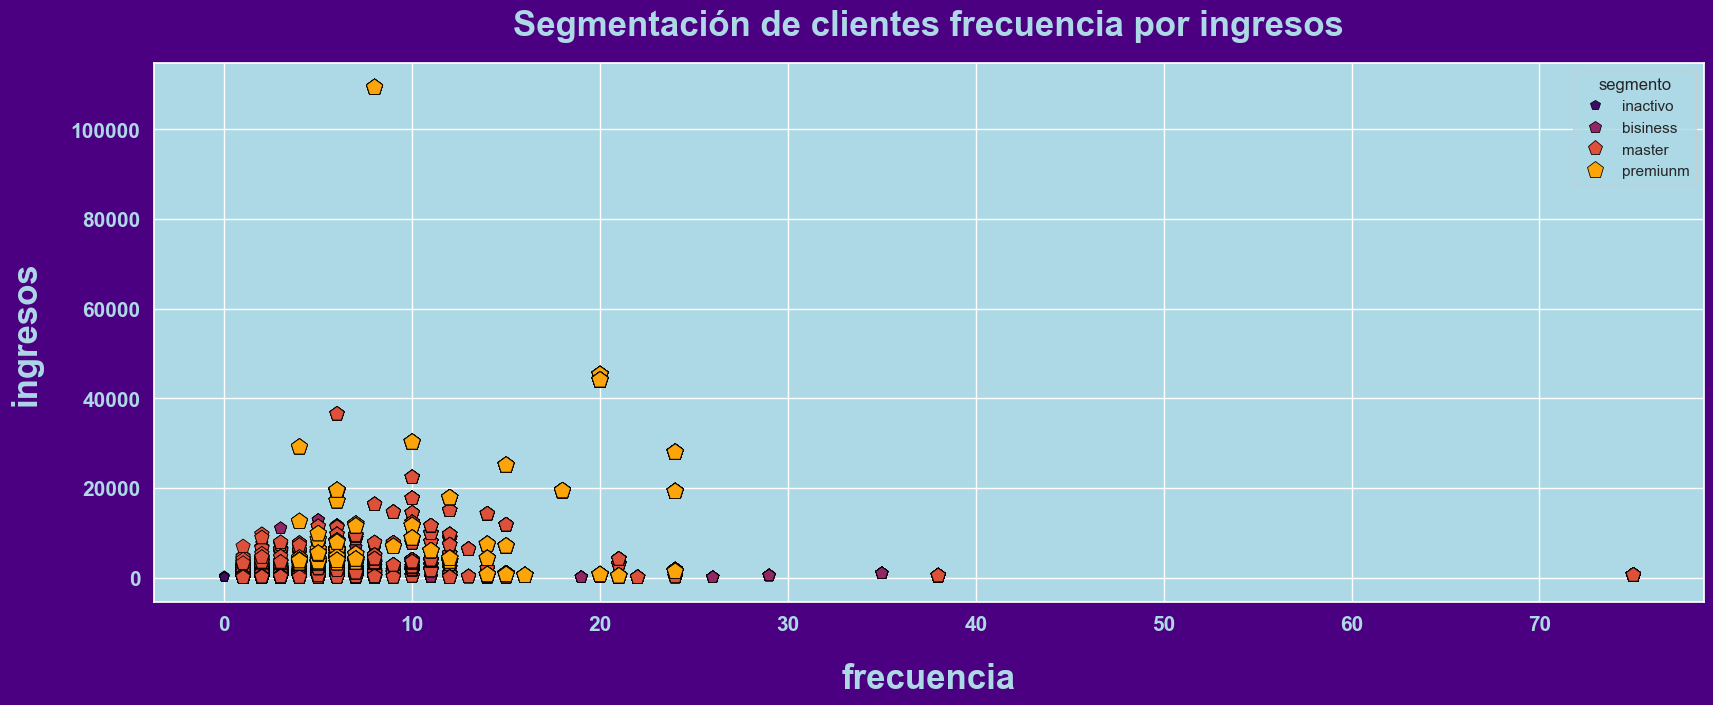

In [56]:
def grafico(x,y,datos):
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.scatterplot(data=datos, x=x , y=y, hue='segmento', palette='inferno',marker='p', edgecolor='black', size='segmento',sizes=(50,150),size_order=['premiunm', 'master','bisiness','inactivo']);
    ax.figure.set_size_inches(20,7)
    ax.set_title('Segmentación de clientes frecuencia por ingresos' ,fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('frecuencia', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('ingresos',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(['segmento'], loc='upper right', bbox_to_anchor=(1.15,.95))
    plt.show()
grafico('frecuencia','ingresos',df_final)

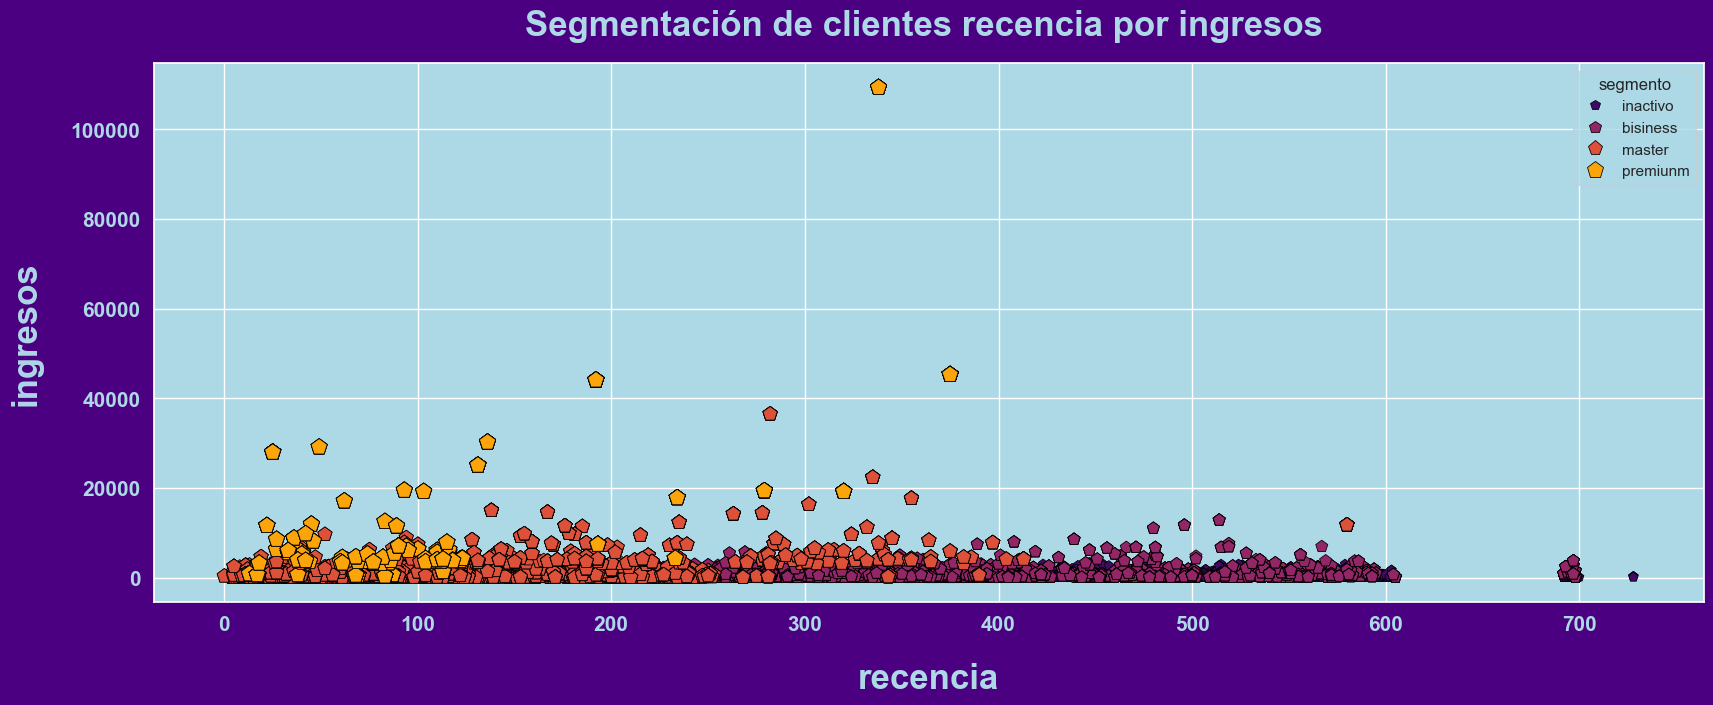

In [57]:
def grafico(x,y,datos):
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.scatterplot(data=datos, x=x , y=y, hue='segmento', palette='inferno',marker='p', edgecolor='black', size='segmento',sizes=(50,150),size_order=['premiunm', 'master','bisiness','inactivo']);
    ax.figure.set_size_inches(20,7)
    ax.set_title('Segmentación de clientes recencia por ingresos ' ,fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('recencia', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('ingresos',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(['segmento'], loc='upper right', bbox_to_anchor=(1.15,.95))
    plt.show()
grafico('recencia','ingresos',df_final)

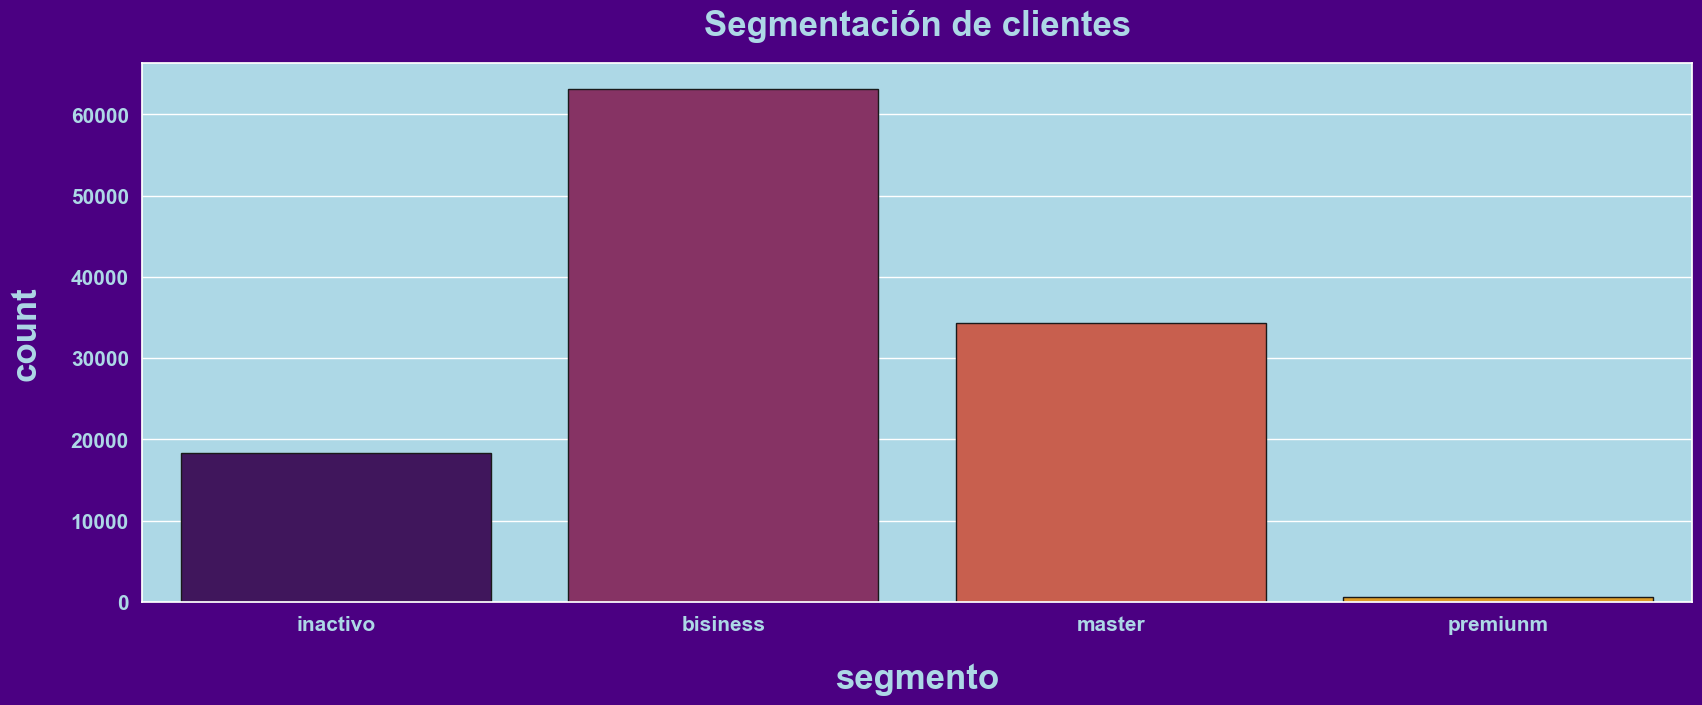

In [64]:
def grafico():
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.countplot(data=df_final,x=df_final['segmento'],hue='segmento',edgecolor='k',palette="inferno");
    ax.figure.set_size_inches(20,7)
    ax.set_title('Segmentación de clientes', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('segmento', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('count',fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # plt.legend(tarjetas)
    plt.show()
grafico()

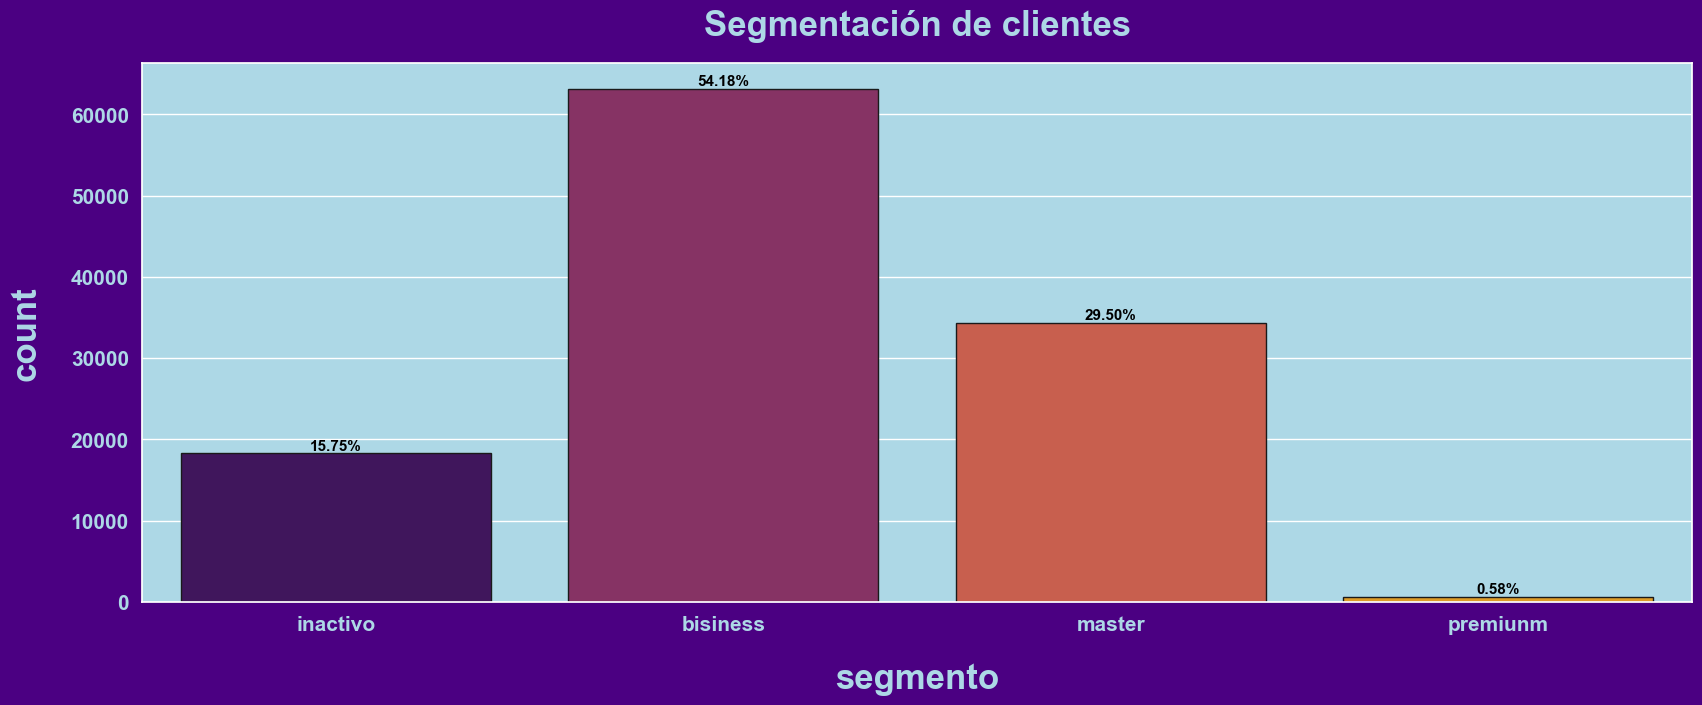

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def grafico():
    sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "indigo"})
    ax = sns.countplot(data=df_final, x='segmento', hue='segmento', edgecolor='k', palette="inferno")
    ax.figure.set_size_inches(20, 7)
    ax.set_title('Segmentación de clientes', fontsize=25, color='lightblue', fontweight='bold', pad=20)
    ax.set_xlabel('segmento', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    ax.set_ylabel('count', fontsize=25, color='lightblue', fontweight='bold', labelpad=20)
    plt.xticks(color='lightblue', size=15, fontweight='bold')
    plt.yticks(color='lightblue', size=15, fontweight='bold')
    # Agregar porcentajes sobre las barras
    total = len(df_final['segmento'])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=11, color='black', fontweight='bold')

    plt.show()

grafico()
